<a href="https://colab.research.google.com/github/uthara999/Machine-Learning-Lab/blob/main/Standardization%26Normalization_using_loan_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Feature scaling** is a technique to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.

However, every dataset does not require features scaling. It is required only when features have different ranges.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("/content/loan-train.csv")

In [ ]:
df.shape

(614, 13)

In [ ]:
df.head(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Deleting only the rows and cols with missing values**

In [ ]:
df1=df.copy()
df1=df1.dropna(axis=0)
df1.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df1.head()

,ApplicantIncome,LoanAmount
1,4583,128.0
2,3000,66.0
3,2583,120.0
4,6000,141.0
5,5417,267.0


In [ ]:
df1 = df1.loc[:10, ["ApplicantIncome","LoanAmount"]]

In [ ]:
df1.shape

(10, 2)

In [ ]:
l = [8, 56, 87, 98, 24]
print(l[:4])

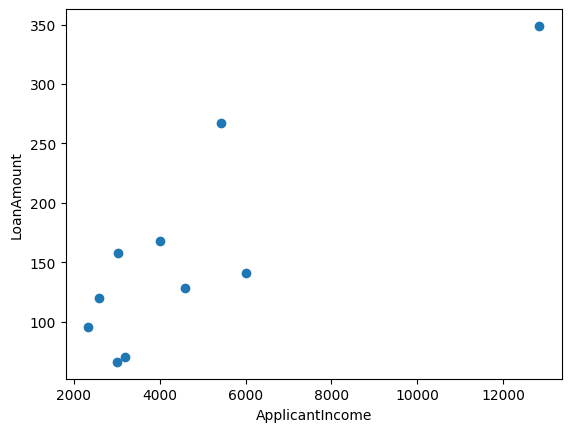

In [ ]:
plt.scatter(df1["ApplicantIncome"],df1["LoanAmount"])
plt.xlabel("ApplicantIncome")
plt.ylabel("LoanAmount")
plt.show()

**Standardization** (also called, Z-score normalization) is a scaling technique such that when it is applied the features will be rescaled so that they’ll have the properties of a standard normal distribution with mean,μ=0 and standard deviation, σ=1; where μ is the mean (average) and σ is the standard deviation from the mean.

This scales the features in a way that they range between [-1,1]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sta = StandardScaler()

In [ ]:
import numpy as np
x = np.array(df1["ApplicantIncome"])
y = np.array(df1["LoanAmount"])

In [ ]:
x

array([ 4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006, 12841,
        3200])

In [ ]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [ ]:
y

array([[128.],
       [ 66.],
       [120.],
       [141.],
       [267.],
       [ 95.],
       [158.],
       [168.],
       [349.],
       [ 70.]])

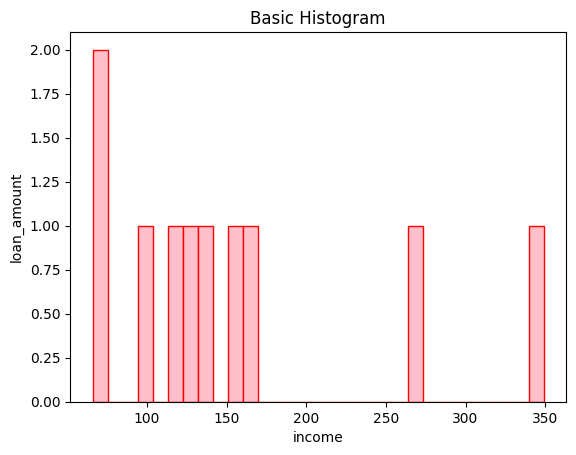

In [ ]:
plt.hist(y, bins=30, color='pink', edgecolor='red')

plt.xlabel('income')
plt.ylabel('loan_amount')
plt.title('Basic Histogram')

plt.show()

In [ ]:
xst = sta.fit_transform(x)
yst = sta.fit_transform(y)

In [ ]:
yst

array([[-0.33410915],
       [-1.06867537],
       [-0.42889189],
       [-0.1800872 ],
       [ 1.31274092],
       [-0.72508795],
       [ 0.02132612],
       [ 0.13980454],
       [ 2.28426399],
       [-1.021284  ]])

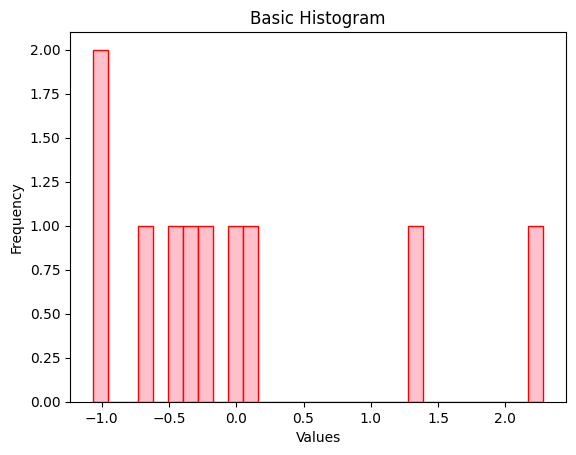

In [ ]:
plt.hist(yst, bins=30, color='pink', edgecolor='red')

plt.xlabel('income')
plt.ylabel('loan_amount')
plt.title('Basic Histogram')

plt.show()

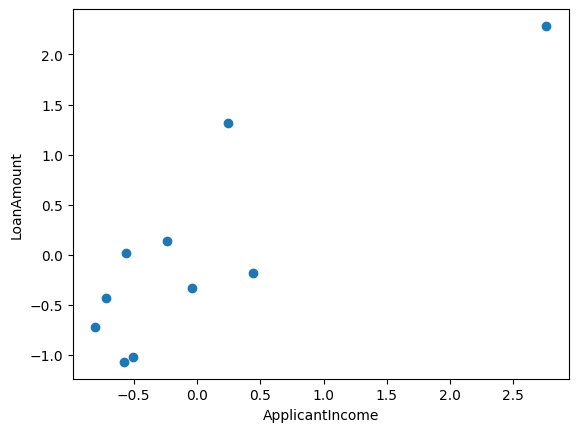

In [ ]:
plt.scatter(xst, yst)
plt.xlabel("ApplicantIncome")
plt.ylabel("LoanAmount")
plt.show()

In [ ]:
ymean = y.mean()
ystd = y.std()
ystandfor9thindex = (y[9] - ymean) / ystd
print(ystandfor9thindex)
print(yst[9])

[-1.021284]
[-1.021284]


**Data normalization** is a standard preprocessing technique used to standardize the values of features in a dataset, bringing them to a common scale. The goal is to enhance data analysis and modeling accuracy by mitigating the influence of varying scales on machine learning models.

This scales the range to [0, 1] or sometimes [-1, 1].

In [ ]:
from sklearn.preprocessing import MinMaxScaler
nor = MinMaxScaler()

In [ ]:
xnor = nor.fit_transform(x)
ynor = nor.fit_transform(y)

In [ ]:
y

array([[128.],
       [ 66.],
       [120.],
       [141.],
       [267.],
       [ 95.],
       [158.],
       [168.],
       [349.],
       [ 70.]])

In [ ]:
ynor

array([[0.21908127],
       [0.        ],
       [0.19081272],
       [0.26501767],
       [0.71024735],
       [0.1024735 ],
       [0.32508834],
       [0.36042403],
       [1.        ],
       [0.01413428]])

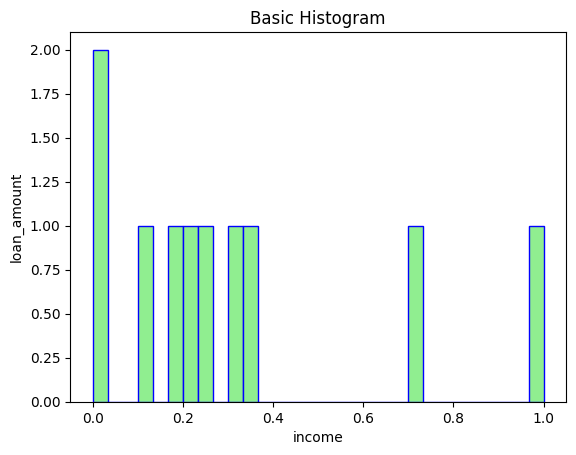

In [ ]:
plt.hist(ynor, bins=30, color='lightgreen', edgecolor='blue')

plt.xlabel('income')
plt.ylabel('loan_amount')
plt.title('Basic Histogram')

plt.show()

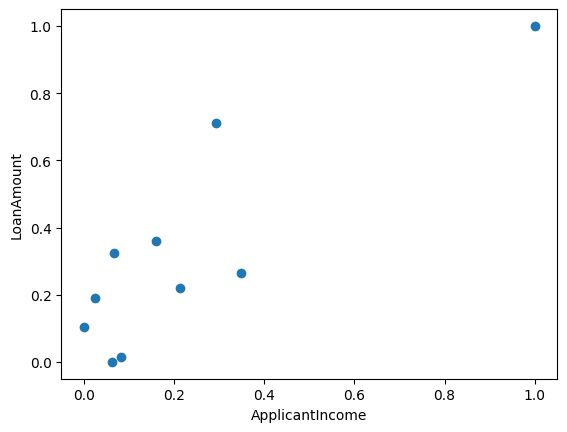

In [ ]:
plt.scatter(xnor, ynor)
plt.xlabel("ApplicantIncome")
plt.ylabel("LoanAmount")
plt.show()

In [ ]:
ymin = y.min()
ymax = y.max()
ynormalize  = (y[7] - ymin) / (ymax - ymin)
print(ynor[7])
print(ynormalize)

In [ ]:
df1['standardized_income'] = yst
df1['normalized_income'] = ynor

In [ ]:
df.head()

,ApplicantIncome,LoanAmount
0,5849,NaN
1,4583,128.0
2,3000,66.0
3,2583,120.0
4,6000,141.0


**Log transformation** is a feature transformation technique used to modify the values of a numeric variable by taking the logarithm of each value.



In [ ]:
df1['ApplicantIncome'] = np.log1p(df1['standardized_income'])
df1['ApplicantIncome'] = np.log1p(df1['normalized_income'])

# Check the updated DataFrame
print(df1)

    ApplicantIncome  LoanAmount  standardized_house_value  \
1          0.198098    0.198098                 -0.334109   
2          0.000000    0.000000                 -1.068675   
3          0.174636    0.174636                 -0.428892   
4          0.235086    0.235086                 -0.180087   
5          0.536638    0.536638                  1.312741   
6          0.097556    0.097556                 -0.725088   
7          0.281479    0.281479                  0.021326   
8          0.307796    0.307796                  0.139805   
9          0.693147    0.693147                  2.284264   
10         0.014035    0.014035                 -1.021284   

    normalized_house_value  standardized_income  normalized_income  
1                 0.219081            -0.334109           0.219081  
2                 0.000000            -1.068675           0.000000  
3                 0.190813            -0.428892           0.190813  
4                 0.265018            -0.180087     

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df.sample(10)

,ApplicantIncome,LoanAmount
7,3036,158.0
1,4583,128.0
10,3200,70.0
3,2583,120.0
2,3000,66.0
8,4006,168.0
5,5417,267.0
6,2333,95.0
9,12841,349.0
4,6000,141.0


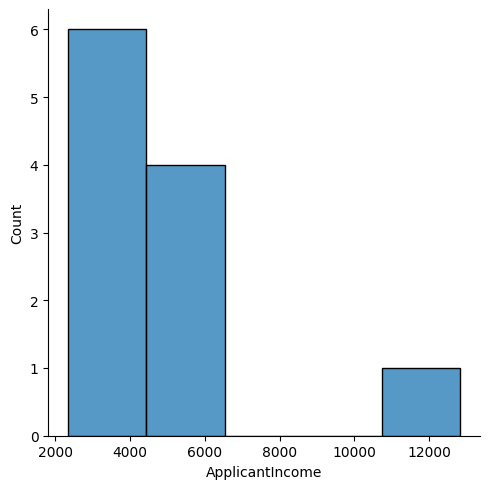

In [ ]:
sns.displot(df['ApplicantIncome'])

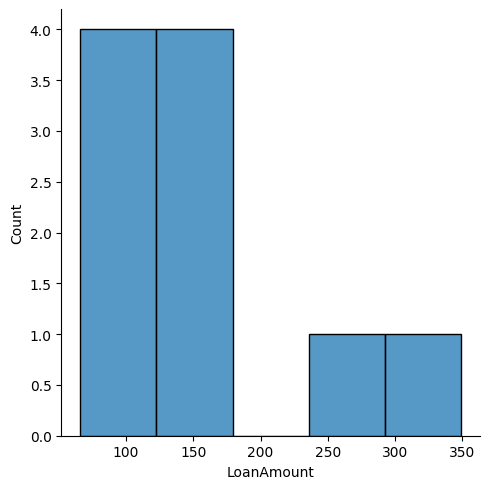

In [ ]:
sns.displot(df['LoanAmount'])

In [ ]:
sns.displot(df['normalized_income'])

KeyError: 'normalized_income'

In [ ]:
#sns.displot(df['log_house_value'])

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(60,10))

# Scatter plot in the first subplot (top-left)
axs[0].scatter(df["housing_median_age"], df["median_house_value"], color='red')
axs[0].set_title('Scatter Plot 1')

# Scatter plot in the second subplot (top-right)
axs[1].scatter(xst, yst, color='green')
axs[1].set_title('Scatter Plot 2')

# Scatter plot in the third subplot (bottom-left)
axs[2].scatter(xnor, ynor, color='orange')
axs[2].set_title('Scatter Plot 3')

# Scatter plot in the fourth subplot (bottom-right)
axs[3].scatter(df['log_house_value'], df['log_housing_median_age'], color='red')
axs[3].set_title('Scatter Plot 4')

# Add a common title for all subplots
fig.suptitle('Four Scatter Plots')

plt.tight_layout()
plt.show()